In [23]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import requests
from bs4 import BeautifulSoup


# Study data files
abridged_crashes_path = "baaa-aircraft-dataset(baaa-aircraft-dataset).csv"



abridged_crashes_metadata = pd.read_csv(abridged_crashes_path)

crash_data_abridged=pd.merge(abridged_crashes_metadata,abridged_crashes_metadata,how="left")
# Display the data table for preview
crash_data_abridged.head()


,Date,Operator,A/C Type,Location,Crew on board,Crew fatalities,PAX on board,PAX fatalities,Total on board,Total fatalities,Flight Type,Flight Phase,Continent,Year,Probable Causes
0,27-Apr-20,Compagnie Generale TRANSAERIENNE,Nieuport-Delage NiD-30,"The Channel, All World",1,1,0,0.0,1,1,Postal,Flight,Europe,1920,Unknown Reasons
1,15-Sep-23,Armée De L'Air,Lioré-et-Olivier LeO H-13,"Mediterranean Sea, All World",0,0,0,0.0,0,0,Scheduled Revenue Flight,Flight,Europe,1923,Technical Factors
2,24-Apr-24,KLM,Fokker F3,"North Sea, All World",1,1,2,2.0,3,3,Scheduled Revenue Flight,Flight,Europe,1924,Technical Factors
3,21-Aug-24,Regia Aeronautica,Dornier DO J wal,"Atlantic Ocean, All World",5,0,0,0.0,5,0,Private,Flight,North America,1924,Technical Factors
4,9-Feb-25,Compagnie Générale d'Enterprises Aéronatiques,Lioré-et-Olivier LeO H-13,"Mediterranean Sea, All World",2,0,0,0.0,2,0,Postal,Flight,Africa,1925,Technical Factors


In [25]:
# Study data files
full_crashes_path = "Plane_Crashes_age.csv"



full_crashes_metadata = pd.read_csv(full_crashes_path)

crash_data_full=pd.merge(full_crashes_metadata,full_crashes_metadata,how="left")
# Display the data table for preview
crash_data_full.head()


,Date,Time,Aircraft,Operator,Registration,Flight phase,Flight type,Survivors,Crash site,Schedule,...,Crew on board,Crew fatalities,Pax on board,PAX fatalities,Other fatalities,Total fatalities,Circumstances,Crash cause,Age of Plane,crash year
0,6/8/1918,NaN,Handley Page V/1500,Handley Page Aircraft Company Ltd,E4104,Takeoff (climb),Test,Yes,Airport (less than 10 km from airport),Cricklewood - Cricklewood,...,6.0,5.0,0.0,0,0.0,5,"Assembled at Cricklewood Airfield in May 1918,...",Technical failure,0,1918
1,8/26/1918,NaN,Blackburn R.T.1 Kangaroo,Royal Air Force - RAF,B9976,Landing (descent or approach),Military,Yes,Airport (less than 10 km from airport),Seaton Carew AFB - Seaton Carew AFB,...,2.0,0.0,0.0,0,0.0,0,"On final approach in bad visibility, aircraft ...",Unknown,0,1918
2,12/31/1918,NaN,Blackburn R.T.1 Kangaroo,Royal Air Force - RAF,B9983,Landing (descent or approach),Military,No,Airport (less than 10 km from airport),Seaton Carew AFB - Seaton Carew AFB,...,2.0,2.0,0.0,0,0.0,2,"While landing, aircraft bounced and crashed in...",Unknown,0,1918
3,4/7/1919,NaN,Unnamed aircraft,Private French,NaN,Landing (descent or approach),Scheduled Revenue Flight,Yes,"Plain, Valley",NaN,...,NaN,0.0,NaN,0,0.0,0,Crashed in unknow circumstances somewhere in F...,Technical failure,0,1919
4,5/1/1919,5H 30M 0S,De Havilland DH.9,Aircraft Transport %26 Travel - AT%26T,G-EAAA,Flight,Postal (mail),No,"Plain, Valley",Hendon - Bournemouth,...,1.0,1.0,0.0,0,0.0,1,The aircraft departed Hendon on a night mail f...,Unknown,0,1919


In [31]:
yearly_averages = crash_data_full.groupby('YOM')['Age of Plane'].mean().reset_index()
yearly_averages

,YOM,Age of Plane
0,1918,4.111111
1,1919,2.195402
2,1920,3.066667
3,1921,2.796296
4,1922,3.058824
...,...,...
98,2016,2.375000
99,2017,2.500000
100,2018,0.500000
101,2019,2.000000


The correlation between between a plane's age and the year of its crash is 0.07


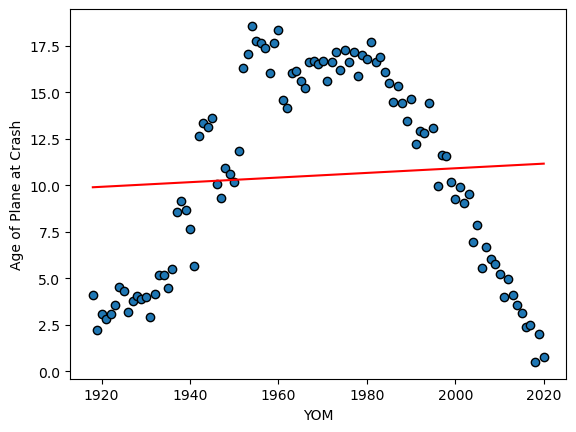

In [53]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation =st.pearsonr(yearly_averages["YOM"],yearly_averages["Age of Plane"])
print(f"The correlation between between a plane's age and the year of its crash is {round(correlation[0],2)}")

# Add the linear regression equation and line to plot
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
(slope, intercept,rvalue, pvalue, stderr)=st.linregress(yearly_averages["YOM"],yearly_averages["Age of Plane"])
regress_values=yearly_averages["YOM"]* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(yearly_averages["YOM"],yearly_averages["Age of Plane"],edgecolors="k")
plt.plot(yearly_averages["YOM"], regress_values, color="red")
plt.xlabel("YOM")
plt.ylabel("Age of Plane at Crash")
plt.show()
